# Fase 3: Análisis Exploratorio de Datos (EDA)

### Vamos a ver las categorias economicas a ver

In [101]:
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../')

from src import support_dataframes as sup_df
import pandas as pd
pd.set_option('display.max_columns', False)

In [102]:
dfs_concatenados = pd.read_csv('../datos/tratados/dfs_concatenados.csv')
dfs_concatenados.head()

,Unnamed: 0.1,Unnamed: 0,codigo_orgao_superior,nome_orgao_superior,codigo_orgao,nome_orgao,codigo_unidade_gestora,nome_unidade_gestora,categoria_economica,origem_receita,especie_receita,detalhamento,valor_previsto_atualizado,valor_lancado,valor_realizado,percentual_realizado,data_lancamento,ano_exercicio
0,0,0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,"0,00",31/12/2013,2013
1,1,1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0.0,0.0,26666621.42,"0,00",31/12/2013,2013
2,2,2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",OUTRAS MULTAS E JUROS DE MORA,0.0,0.0,301251.13,"0,00",31/12/2013,2013
3,3,3,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIV.ATIVA POR INFRAÇÃO ADMINISTRATIVA,0.0,0.0,1855.58,"0,00",31/12/2013,2013
4,4,4,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",OUTRAS RESTITUICOES,0.0,0.0,52140.68,"0,00",31/12/2013,2013


In [103]:
dfs_concatenados['categoria_economica'].unique()

array(['Receitas Correntes', 'Receitas de Capital', 'Sem informação'],
      dtype=object)

## Unificamos las categorias

In [104]:
dfs_concatenados['categoria_economica'] = dfs_concatenados['categoria_economica'].replace({
    'Receitas Correntes - intra-orçamentárias': 'Receitas Correntes',
    'Receitas de Capital - intra-orçamentárias': 'Receitas de Capital',
})

In [105]:
dfs_concatenados['categoria_economica'].unique()

array(['Receitas Correntes', 'Receitas de Capital', 'Sem informação'],
      dtype=object)

In [106]:
dfs_concatenados['categoria_economica'].fillna('Sem informação', inplace=True)

C:\Users\JLFA\AppData\Local\Temp\ipykernel_1944\1450374585.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfs_concatenados['categoria_economica'].fillna('Sem informação', inplace=True)


In [107]:
sup_df.mostrar_porcentaje_nulos(dfs_concatenados)

,Columna,Porcentaje Nulos
12,valor_previsto_atualizado,5.000794
14,valor_realizado,3.841690
9,origem_receita,3.743847
6,codigo_unidade_gestora,3.272565
10,especie_receita,3.111378
11,detalhamento,2.858878
13,valor_lancado,2.574607
15,percentual_realizado,2.351928
16,data_lancamento,2.306710
7,nome_unidade_gestora,1.898285


In [108]:
#dfs_concatenados.to_csv('../datos/tratados/dfs_concatenados.csv')

## 1. Distribución de Ingresos por Categoría Económica:

### Analizar las categorías de ingresos más significativas y su participación en los ingresos totales.

In [109]:
distribucion_ingresos = dfs_concatenados.groupby('categoria_economica')['valor_realizado'].sum()

total_ingresos = distribucion_ingresos.sum()
proporcion_ingresos = (distribucion_ingresos / total_ingresos) * 100

proporcion_ingresos


categoria_economica
Receitas Correntes     49.904557
Receitas de Capital    48.768647
Sem informação          1.326796
Name: valor_realizado, dtype: float64

In [110]:
distribucion_ingresos

categoria_economica
Receitas Correntes     1.230565e+13
Receitas de Capital    1.202556e+13
Sem informação         3.271665e+11
Name: valor_realizado, dtype: float64

### Calcular la diferencia promedio entre ingresos previstos y realizados por cada categoría.

In [111]:
dfs_concatenados['diferencia'] = dfs_concatenados['valor_previsto_atualizado'] - dfs_concatenados['valor_realizado']

diferencia_promedio = dfs_concatenados.groupby('categoria_economica')['diferencia'].mean()

diferencia_promedio


categoria_economica
Receitas Correntes     1.024532e+06
Receitas de Capital    6.707863e+07
Sem informação         4.026452e+07
Name: diferencia, dtype: float64

In [112]:
diferencia_promedio = dfs_concatenados.groupby('categoria_economica')['diferencia'].describe().T

sup_df.describe(diferencia_promedio)

categoria_economica,Receitas Correntes,Receitas de Capital,Sem informação
count,8.000000e+00,8.000000e+00,8.000000e+00
mean,3.042862e+10,1.564240e+11,1.135525e+11
std,1.584743e+11,5.900158e+11,3.279925e+11
min,-1.562859e+11,-3.500223e+11,-2.358799e+10
25%,-1.077977e+04,-5.617950e+05,-1.309689e+04
50%,4.462315e+05,1.255192e+04,8.688285e+03
75%,3.112965e+08,4.331289e+09,1.775288e+09
max,3.984709e+11,1.584225e+12,9.249874e+11
median,4.462315e+05,1.255192e+04,8.688285e+03


## 2. Análisis Temporal:

### Evaluar las tendencias a lo largo del tiempo, por ejemplo, cómo cambian los ingresos realizados de un mes a otro o de un año a otro.

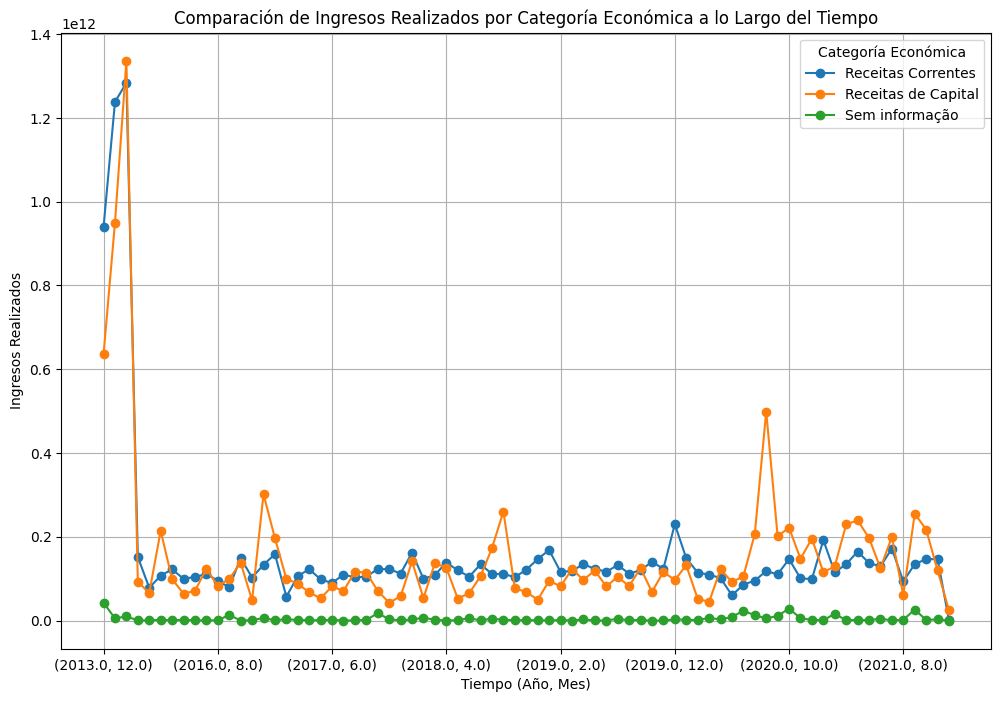

In [115]:
dfs_concatenados['data_lancamento'] = pd.to_datetime(dfs_concatenados['data_lancamento'], format='%d/%m/%Y', errors='coerce')

dfs_concatenados['anio'] = dfs_concatenados['data_lancamento'].dt.year
dfs_concatenados['mes'] = dfs_concatenados['data_lancamento'].dt.month

categorias_a_comparar = ['Receitas Correntes', 'Receitas de Capital', 'Sem informação']

dfs_concatenados_filtrado = dfs_concatenados[dfs_concatenados['categoria_economica'].isin(categorias_a_comparar)]

ingresos_por_categoria = dfs_concatenados_filtrado.groupby(['anio', 'mes', 'categoria_economica'])['valor_realizado'].sum().unstack()

ingresos_por_categoria.plot(kind='line', figsize=(12, 8), marker='o')

plt.title('Comparación de Ingresos Realizados por Categoría Económica a lo Largo del Tiempo')
plt.xlabel('Tiempo (Año, Mes)')
plt.ylabel('Ingresos Realizados')
plt.legend(title='Categoría Económica')
plt.grid(True)

plt.show()

## 3. Identificación de Discrepancias:

### Investigar las categorías con mayor diferencia entre lo previsto y lo realizado, identificando patrones en la subejecución o sobre ejecución.

### Identificar las mayores discrepancias

In [116]:
dfs_concatenados['diferencia'] = dfs_concatenados['valor_previsto_atualizado'] - dfs_concatenados['valor_realizado']

dfs_concatenados['diferencia_absoluta'] = np.abs(dfs_concatenados['diferencia'])

diferencias_absolutas = dfs_concatenados.groupby('categoria_economica')['diferencia_absoluta'].sum()

diferencias_ordenadas = diferencias_absolutas.sort_values(ascending=False)

diferencias_ordenadas.head(10) 

categoria_economica
Receitas de Capital    1.991773e+13
Receitas Correntes     1.976165e+13
Sem informação         1.255850e+12
Name: diferencia_absoluta, dtype: float64


### Clasificar entre subejecución y sobre ejecución

In [117]:
subejecucion = dfs_concatenados[dfs_concatenados['diferencia'] < 0].groupby('categoria_economica')['diferencia'].sum().sort_values()

sobre_ejecucion = dfs_concatenados[dfs_concatenados['diferencia'] > 0].groupby('categoria_economica')['diferencia'].sum().sort_values(ascending=False)

print("Categorías con subejecución:")
print(subejecucion.head())  

print("\nCategorías con sobre ejecución:")
print(sobre_ejecucion.head())


Categorías con subejecución:
categoria_economica
Receitas Correntes    -9.423521e+12
Receitas de Capital   -9.051625e+12
Sem informação        -2.734160e+11
Name: diferencia, dtype: float64

Categorías con sobre ejecución:
categoria_economica
Receitas de Capital    1.086610e+13
Receitas Correntes     1.033812e+13
Sem informação         9.824340e+11
Name: diferencia, dtype: float64


### Análisis temporal de las discrepancias

anio                       2013.0        2014.0  ...        2020.0        2021.0
categoria_economica                              ...                            
Receitas Correntes   8.134172e+10  9.869941e+10  ...  2.927339e+11 -2.115555e+11
Receitas de Capital  2.204621e+11  3.166265e+10  ... -1.352149e+11  6.553213e+11
Sem informação      -1.184549e+10  1.472004e+09  ... -9.742138e+10 -3.766588e+10

[3 rows x 9 columns]


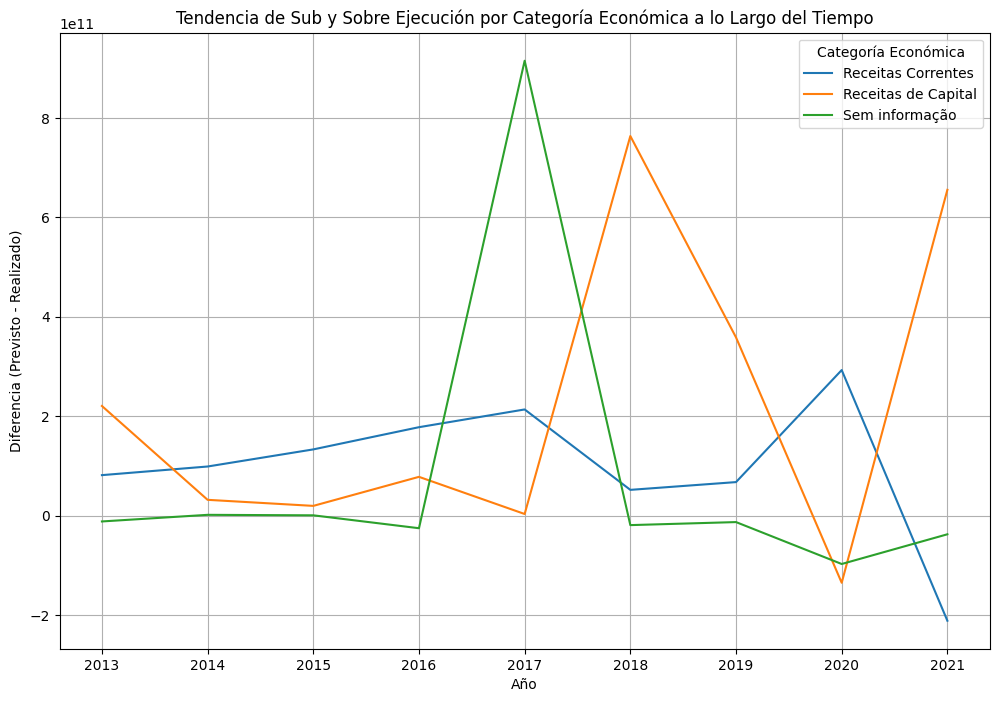

In [118]:
diferencias_temporales = dfs_concatenados.groupby(['categoria_economica', 'anio'])['diferencia'].sum().unstack()

print(diferencias_temporales)

    
diferencias_temporales.T.plot(kind='line', figsize=(12, 8))

plt.title('Tendencia de Sub y Sobre Ejecución por Categoría Económica a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Diferencia (Previsto - Realizado)')
plt.grid(True)
plt.legend(title='Categoría Económica')
plt.show()


### Análisis de subcategorías y detalles específicos

In [119]:
diferencias_por_subcategoria = dfs_concatenados.groupby(['categoria_economica', 'especie_receita'])['diferencia'].sum().sort_values()

diferencias_por_subcategoria.head(10)


categoria_economica  especie_receita                              
Receitas de Capital  Resultado do Banco Central do Brasil            -5.102913e+11
                     Amortizações de Empréstimos                     -2.520099e+11
Sem informação       Contribuições sociais                           -7.100797e+10
Receitas de Capital  Remuneração das Disponibilidades do Tesouro     -6.504025e+10
Sem informação       Impostos                                        -5.427058e+10
Receitas de Capital  Operações de crédito - mercado externo          -4.081848e+10
Receitas Correntes   Exploração de recursos naturais                 -3.470629e+10
Receitas de Capital  Remuneração das Disponibilidades do Tesouro N   -3.003062e+10
Receitas Correntes   Receitas decorrentes de aportes periódicos pa   -2.855149e+10
                     Valores Mobiliários                             -2.798480e+10
Name: diferencia, dtype: float64


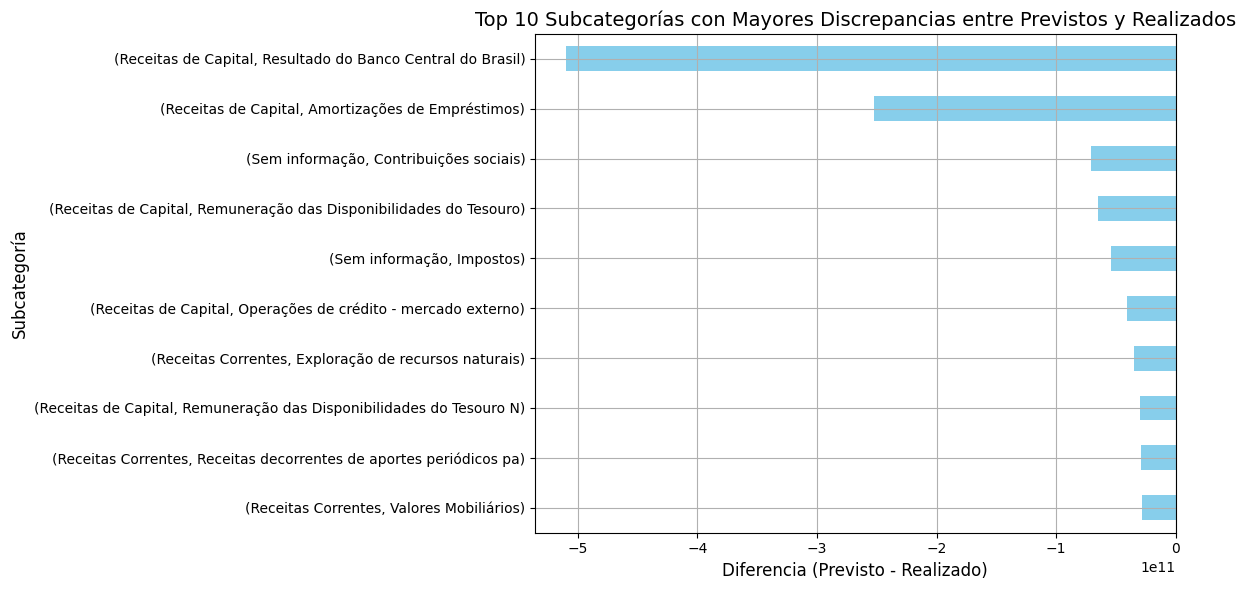

In [120]:
top_discrepancias = diferencias_por_subcategoria.head(10)

plt.figure(figsize=(12, 6))
top_discrepancias.plot(kind='barh', color='skyblue')

plt.title('Top 10 Subcategorías con Mayores Discrepancias entre Previstos y Realizados', fontsize=14)
plt.xlabel('Diferencia (Previsto - Realizado)', fontsize=12)
plt.ylabel('Subcategoría', fontsize=12)

plt.gca().invert_yaxis() # nvertir el eje Y para que las mayores discrepancias estén arriba
plt.grid(True)

plt.tight_layout()
plt.show()


In [123]:
#dfs_concatenados.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
dfs_concatenados.to_csv('../datos/tratados/dfs_concatenados.csv')